# Mutual information

In [1]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Classification

In [3]:
# load dataset

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


[]

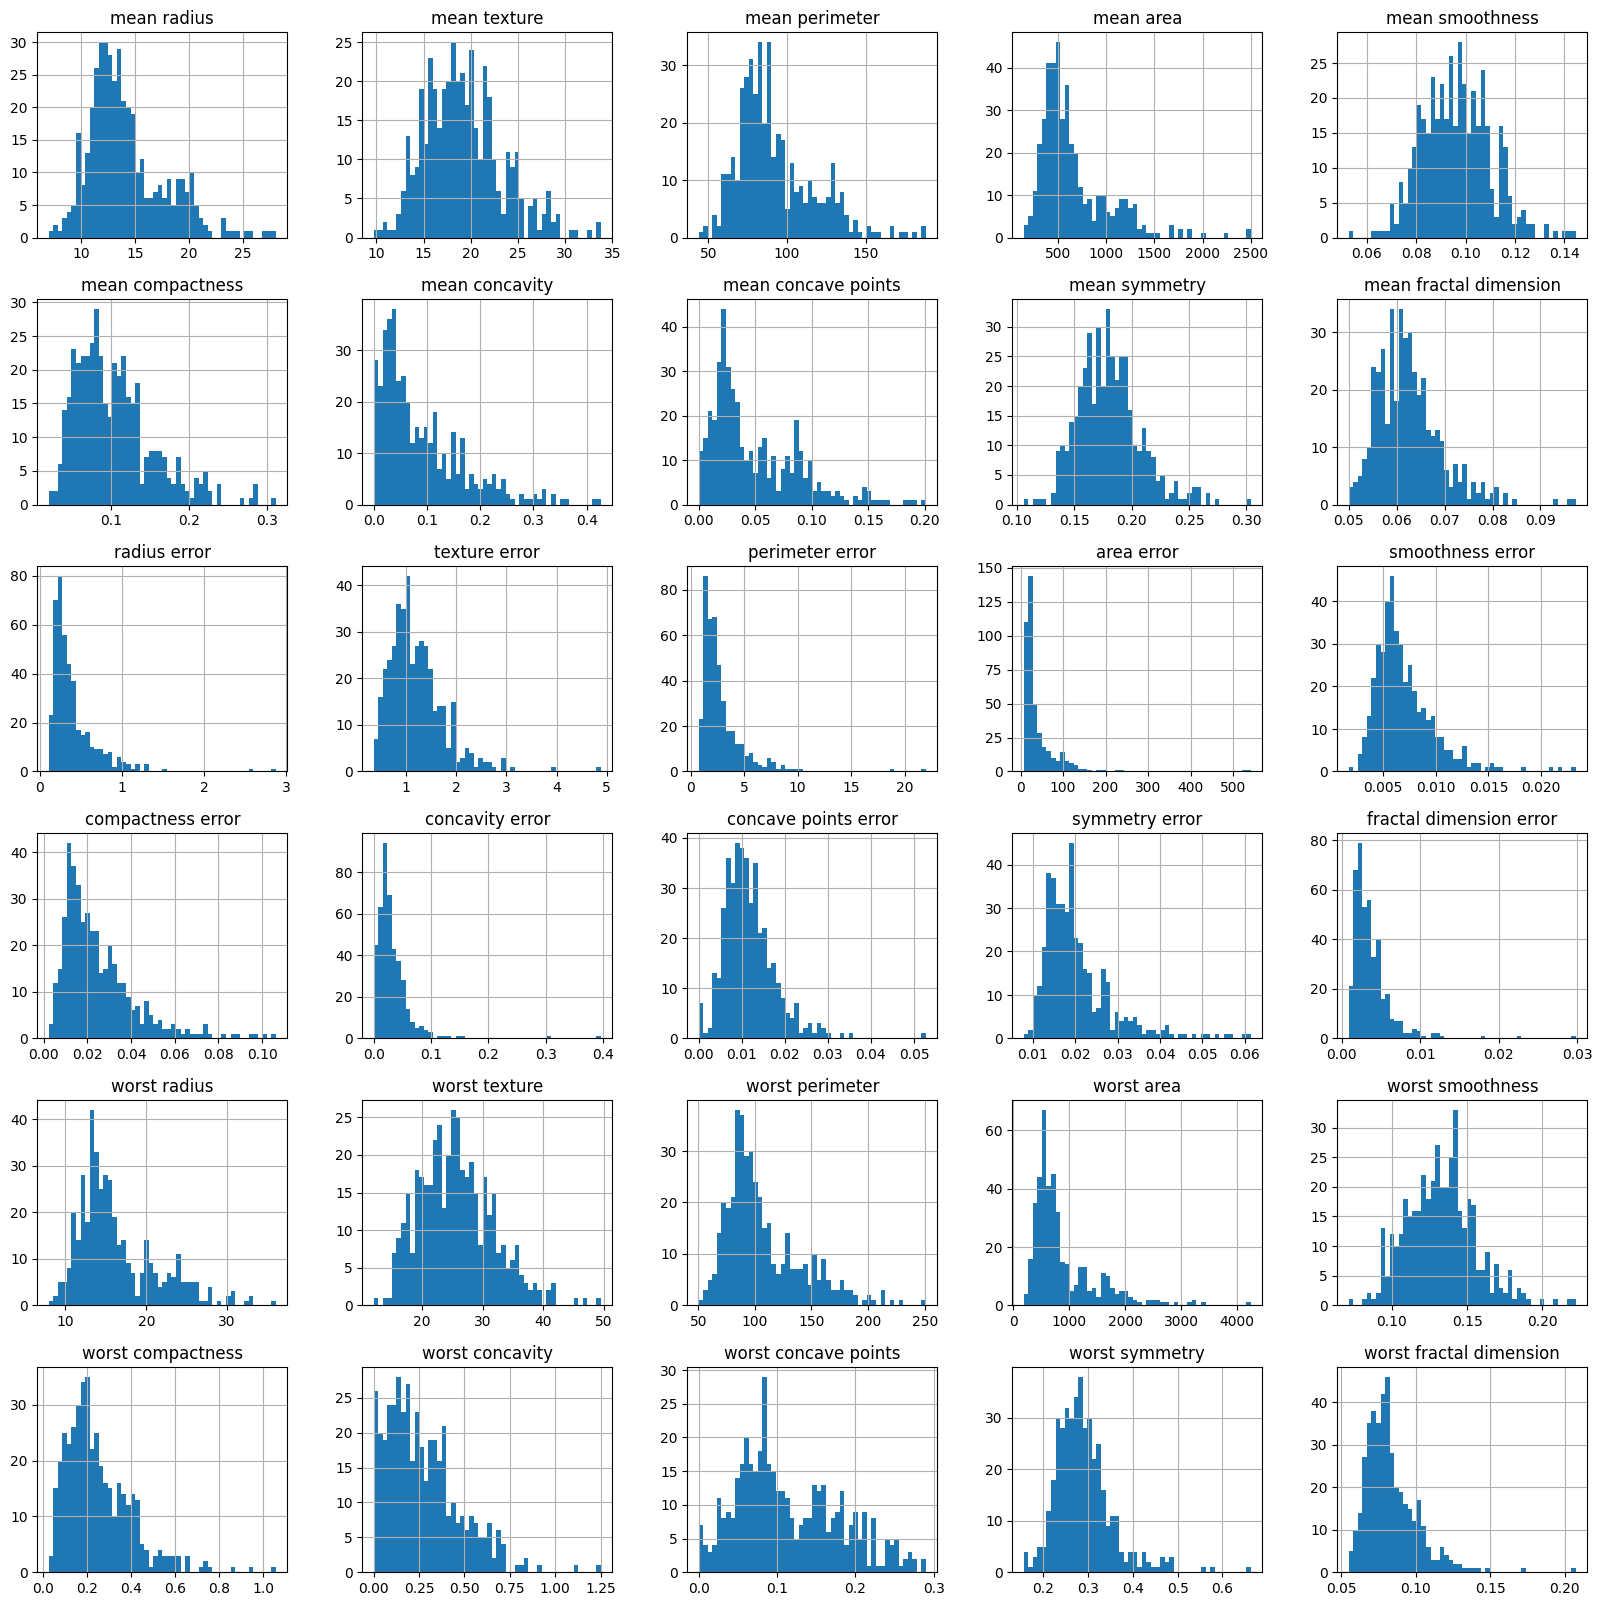

In [5]:
X_train.hist(bins=50, figsize=(20, 20))
plt.plot()

## Mutual Information

In [6]:
# calculate the mutual information between the
# variables and the target

mi = mutual_info_classif(X_train, y_train, random_state=42)
mi

array([0.33245563, 0.07886352, 0.3955884 , 0.35041167, 0.09681211,
       0.2543844 , 0.36952764, 0.4481318 , 0.08601205, 0.02245148,
       0.24540984, 0.        , 0.2531849 , 0.33463724, 0.01364823,
       0.06080088, 0.12302022, 0.144789  , 0.        , 0.04887738,
       0.44247429, 0.12516385, 0.45588724, 0.45111359, 0.08631011,
       0.23481521, 0.30971506, 0.44215969, 0.0716687 , 0.02077104])

Text(0.5, 1.0, 'Mutual information between predictors and target')

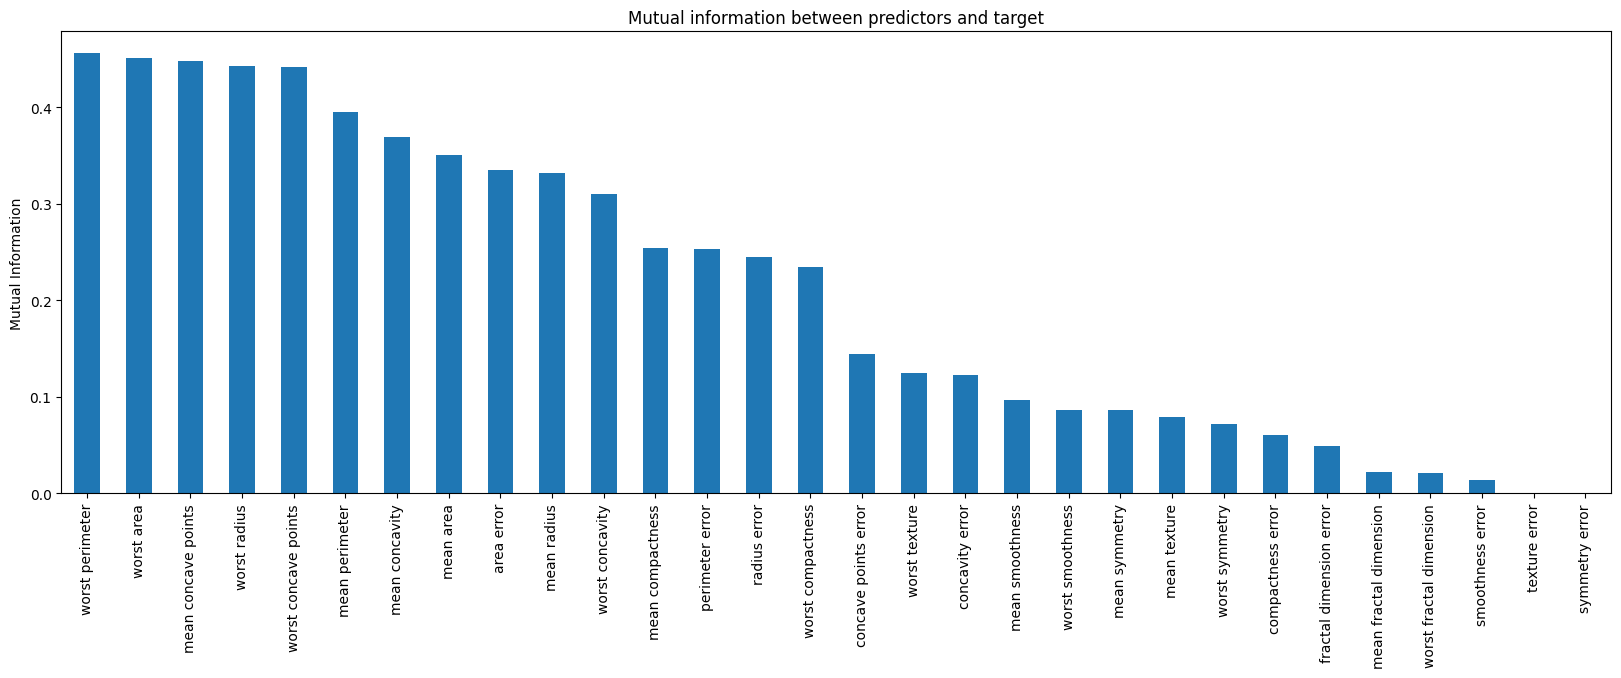

In [7]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

We've got a couple of features whose MI is 0. We could discard those from the dataset. Alternatively, we can select the top k ranking features.

## Select top k features based on MI

In [8]:
# we will select the top 5 features
# based on their mutual information

# select features
sel = SelectKBest(mutual_info_classif, k=5).set_output(transform="pandas")

sel.fit(X_train, y_train)

# display features
X_train.columns[sel.get_support()]

Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [9]:
# remove low ranking features:

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.head()

,mean concave points,worst radius,worst perimeter,worst area,worst concave points
293,0.022800,13.06,84.35,517.8,0.09140
332,0.007583,11.98,76.91,436.1,0.02022
565,0.097910,23.69,155.00,1731.0,0.16280
278,0.012380,15.50,98.91,739.1,0.05185
489,0.023070,19.18,127.30,1084.0,0.08737


# Regression

In [10]:
# load the California House price data

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# Separate data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

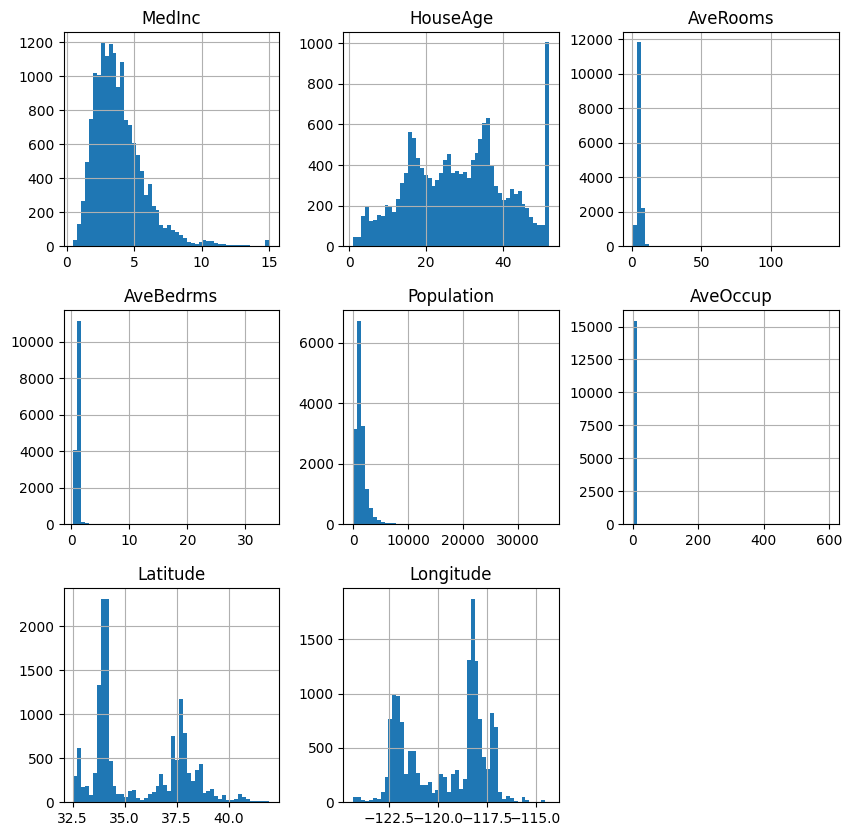

In [12]:
X_train.hist(bins=50, figsize=(10, 10))

plt.show()

## Determine Mutual Information

Text(0.5, 1.0, 'Mutual information between predictors and target')

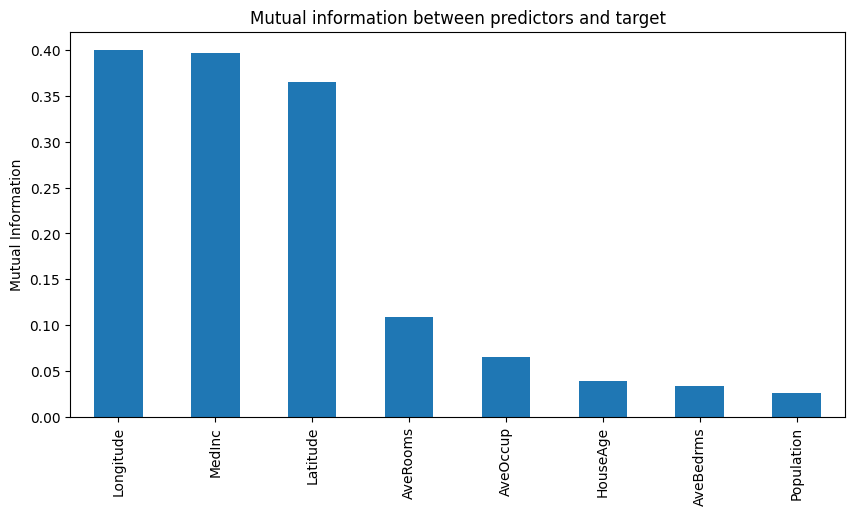

In [13]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train, random_state=42)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

All features show positive MI, so we could keep them all. For the demo, we will select the features in the top percentile.

## Select top percentile features

In [14]:
# Select the features in the top percentile
sel = SelectPercentile(
    mutual_info_regression, percentile=30).set_output(
        transform="pandas")

sel.fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')

In [15]:
# remove low ranking features:

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.head()

,MedInc,Latitude,Longitude
19226,7.3003,38.46,-122.68
14549,5.9547,32.95,-117.24
9093,3.2125,34.68,-118.27
12213,6.9930,33.51,-117.18
12765,2.5162,38.62,-121.41


# Dataset with continuous and discrete variables

In [16]:
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder

In [17]:
# load titanic dataset

variables = ['pclass', 'survived', 'sex', 'age',
             'sibsp', 'parch', 'fare', 'cabin', 'embarked']

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl',
                   usecols=variables,
                   na_values='?',
                   dtype={'fare': float, 'age': float},
                   )

data.dropna(subset=['embarked', 'fare'], inplace=True)
data['age'] = data['age'].fillna(data['age'].mean())


def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return 'N'


data['cabin'] = data['cabin'].apply(get_first_cabin).str[0]
encoder = RareLabelEncoder(variables='cabin', n_categories=2)
data = encoder.fit_transform(data)

# convert categorical variables to numbers
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=["sex", "cabin", "embarked"])
data = encoder.fit_transform(data)

data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.0000,0,0,211.3375,0,0
1,1,1,1,0.9167,1,2,151.5500,1,0
2,1,0,0,2.0000,1,2,151.5500,1,0
3,1,0,1,30.0000,1,2,151.5500,1,0
4,1,0,0,25.0000,1,2,151.5500,1,0


In [18]:
# separate data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((914, 8), (392, 8))

In [19]:
X_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked'], dtype='object')

In [20]:
# calculate the mutual information between the 
# variables and the target

discrete_vars = [True, True, False, True, True, False, True, True]

mi = mutual_info_classif(X_train, y_train, discrete_features=discrete_vars, random_state=42)

mi

array([0.05762333, 0.13060906, 0.00353772, 0.01505698, 0.01739128,
       0.13471196, 0.04897479, 0.01454174])

Text(0.5, 1.0, 'Mutual information between predictors and target')

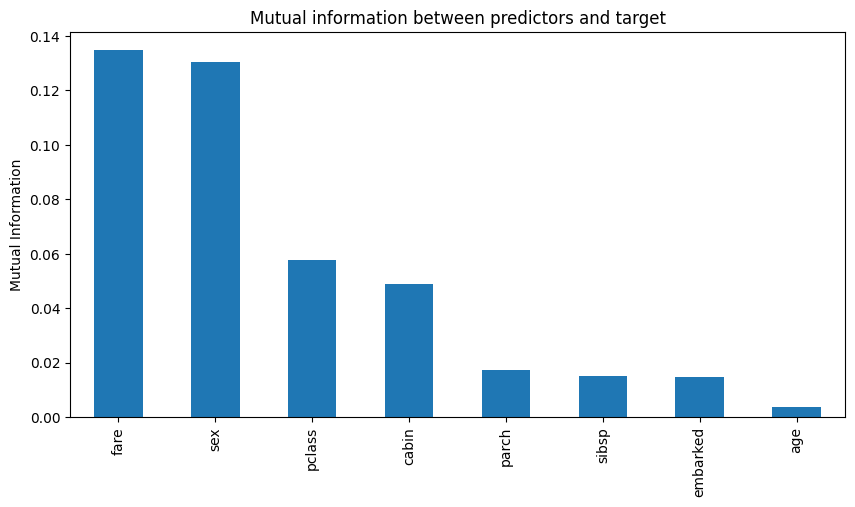

In [21]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In this case, all features show MI greater than 0, so we could select them all.